C:\Users\Aroshish\AppData\Local\Temp\ipykernel_2164\231400908.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


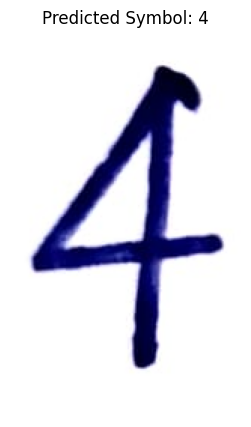

Predicted Symbol: 4


In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class MathSymbolCNN(nn.Module):
    def __init__(self, num_classes):
        super(MathSymbolCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

def predict_math_symbol(image_path, model_path):
    # Load the saved model and label mappings
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    checkpoint = torch.load(model_path, map_location=device)

    # Prepare image transform
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Load and preprocess the image
    image = Image.open(image_path)
    transformed_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Prepare the model
    model = MathSymbolCNN(len(checkpoint['idx_to_label']))
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()  # Set to evaluation mode

    # Get device
    
    model = model.to(device)
    transformed_image = transformed_image.to(device)

    # Perform prediction
    with torch.no_grad():
        outputs = model(transformed_image)
        _, predicted = torch.max(outputs, 1)
        predicted_idx = predicted.item()

    # Get the predicted label
    idx_to_label = checkpoint['idx_to_label']
    predicted_label = idx_to_label[predicted_idx]

    # Visualize the result
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted Symbol: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Example usage
if __name__ == "__main__":
    # Update these paths for your environment
    image_path = 'C:\\Users\\Aroshish\\Downloads\\vbn.png'
    model_path = 'final_math_symbol_cnn.pth'

    # Predict and display the symbol
    result = predict_math_symbol(image_path, model_path)
    print(f"Predicted Symbol: {result}")